<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week11_ImageClassification_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 11
# Image Classification with Convolutional Neural Network (CNN)

**Reference:** [TensorFlow Tutorial on Convolutional Neural Networks](https://www.tensorflow.org/tutorials/images/cnn)

**Please enable GPU computing before proceed.**

### Ideas
- Dense layers may contain redudent connections
- Some information should be invariant to spacial translation
- The number of parameters can be reduced if certain weights share the same value.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS4LZdFg5QPbgDb-jvP-YT0N51eRkWg45uF0ybsB5k0Ubr0-gOC&usqp=CAU" width="600">

## 2D Convolution Layer
<img src="https://cdn-media-1.freecodecamp.org/images/Gjxh-aApWTzIRI1UNmGnNLrk8OKsQaf2tlDu" width="600">

**Comparison:**
If this were a densely connect layer:
- The number of connection would be: 64 * 64 = 4096
- The number of weight parameters would be: 4096

Now that this is a convolutional layer (with a 3*3 filter):
- The number of connection is: 9 * 64 = 576
- The number of parameters is: 9



**2D smoothing with Gaussian kernel**

<img src="https://www.cs.umd.edu/class/fall2016/cmsc426/matlab/filters/html/filters_tutorial_03.png" width="600">

<img src="https://www.mathworks.com/help/examples/stats/win64/ComputeTheMultivariateNormalPdfExample_01.png" width="400">

**Edge detection**

<img src="https://media5.datahacker.rs/2018/10/edges.jpg" width="600">

<img src="https://www.researchgate.net/profile/Ching-Wei_Wang/publication/221472523/figure/fig5/AS:305540338077700@1449857901164/Convolution-filter-for-simple-edge-detect.png" width="200">

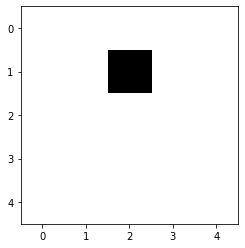

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# An example of edge detection

temp_img = np.array([[100, 0, 0, 0, 0],
                     [0, 100, 100, 100, 100],
                     [0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0]])
plt.imshow(temp_img, cmap="Greys")

In [ ]:
# Let's apply the above filter to this image.
filter = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

def relu(t):
    return max(0, t)

def convolution(data, filter):
    m = data.shape[0] # Assume the data matrix is a sqaure
    n = filter.shape[0] # Assume the filter is a sqaure
    output_matrix = np.zeros([m-n+1, m-n+1])
    # calculate the input for the first value in the output matrix
    # sum = 0
    # for i in range(n):
    #     for j in range(n):
    #         sum += data[i, j] * filter[i, j]

    for row in range(m-n+1):
        for col in range(m-n+1):
            sum = 0
            for i in range(n):
                for j in range(n):
                    sum += data[row+i, col+j] * filter[i, j]
            output_matrix[row, col] = sum
    return output_matrix

[[   0.    0. -100.]
 [   0.    0. -100.]
 [   0.    0.    0.]]


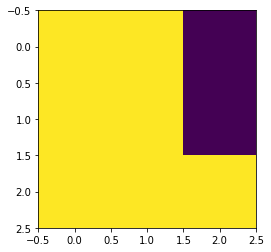

In [ ]:
result = convolution(temp_img, filter)
print(result)
plt.imshow(result)

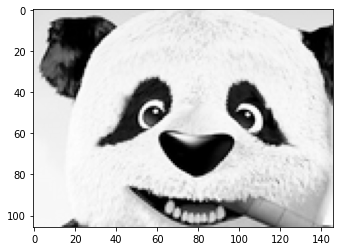

In [ ]:
# Let's test a 5x5 Gaussian filter
filter = np.array([[1, 4, 7, 4, 1],
                   [4, 16, 26, 16, 4],
                   [7, 26, 41, 26, 7],
                   [4, 16, 26, 16, 4],
                   [1, 4, 7, 4, 1]])

import PIL
from PIL import ImageOps

temp_img2 = PIL.Image.open("panda.png")
temp_img2 = ImageOps.grayscale(temp_img2)
temp_img2 = (255 - np.array(temp_img2)) / 255.0
plt.imshow(temp_img2, cmap="Greys")

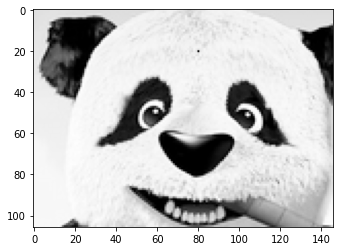

In [ ]:
# Add one noise point
temp_img2[20, 80] = 1.0
plt.imshow(temp_img2, cmap="Greys")

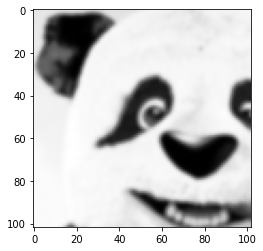

In [ ]:
# Apply the Gaussian filter with the image
result = convolution(temp_img2, filter)
plt.imshow(result, cmap="Greys")

In [ ]:
# Let's compare the block around the black dot from two images

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

before = temp_img2[18:24, 78:84]
after = result[18:24, 78:84]

# Put two matrices on the same scale
before = before / before[0, 0]
after = after / after[0, 0]

print("Before:\n", before)
print("After: \n", after)

Before:
 [[ 1.    0.96  1.    1.08  1.72  2.16]
 [ 0.8   1.48  1.8   1.56  1.44  0.84]
 [ 1.2   1.96 10.2   1.76  1.36  0.88]
 [ 1.24  1.28  2.16  1.04  1.24  1.12]
 [ 0.96  2.    1.84  0.8   1.72  0.96]
 [ 2.2   0.72  1.28  1.92  1.48  1.48]]
After: 
 [[1.    0.802 0.536 0.407 0.384 0.368]
 [0.834 0.678 0.492 0.403 0.387 0.378]
 [0.605 0.544 0.478 0.44  0.432 0.42 ]
 [0.499 0.5   0.477 0.457 0.46  0.459]
 [0.455 0.455 0.43  0.414 0.433 0.454]
 [0.398 0.381 0.365 0.364 0.389 0.417]]


## LeNet5 on MNIST

Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner proposed a neural network architecture for handwritten and machine-printed character recognition in 1990’s which they called LeNet-5. It is one of the early example of a convolutional neural network

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png" width="800">

## Max-Pooling Layer
<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" width="500">

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [ ]:
model_cnn = tf.keras.models.Sequential()

model_cnn.add(tf.keras.layers.Conv2D(filters=6,
                                 kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))

model_cnn.add(tf.keras.layers.MaxPooling2D())

model_cnn.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3, 3),
                                 activation='relu'))

model_cnn.add(tf.keras.layers.MaxPooling2D())

model_cnn.add(tf.keras.layers.Flatten())

model_cnn.add(tf.keras.layers.Dense(units=120,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=84,
                       activation='relu'))
model_cnn.add(tf.keras.layers.Dense(units=10,
                       activation='softmax'))

In [ ]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model_cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # (from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model_cnn.fit(x_train.reshape(list(x_train.shape) + [1]), y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 15s 4ms/step - loss: 0.2102 - accuracy: 0.9346 - val_loss: 0.0880 - val_accuracy: 0.9723
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0557 - val_accuracy: 0.9827
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0339 - accuracy: 0.9886 - val_loss: 0.0468 - val_accuracy: 0.9863
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0437 - val_accuracy: 0.9897
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0229 - accuracy: 0.9925 - val_loss: 0.0518 - val_accuracy

In [ ]:
model_cnn.evaluate(x_test.reshape(list(x_test.shape) + [1]), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0457 - accuracy: 0.9867


[0.04573873430490494, 0.9866999983787537]

## Dropout and Model Regularization
For a complicated model like deep neural networks, a major concern on its performance is model overfitting:

![underfitting and overfitting](https://cdn-images-1.medium.com/max/1200/1*cdvfzvpkJkUudDEryFtCnA.png)

In plain words, overfitting happens when the model is **memorizing** the training data, and become poorly at **generalizing** what they've learned to unseen data. Think about a student who memorized the entire machine learning textbook. He may appear quite knowledgable in machine learning when asked things directly from the book, but there is no way he can perform a machine project on a dataset not mentioned in the book.

### How to identify model overfitting?
- Visualize the model (decision boundary, regression curves, etc.)
- Observe the trends in training loss and the testing loss

![](https://cdn-images-1.medium.com/max/1600/1*vuZxFMi5fODz2OEcpG-S1g.png)

### How to prevent model overfitting?
1. Start with a simple model

![](https://image.slidesharecdn.com/lawsofwebdesign-091104020153-phpapp01/95/laws-of-web-development-11-728.jpg?cb=1257384621)
2. Add penalty to complicated models
    - L1 Regularizor
    - L2 Regularizor
    - Elastic Net

3. (For Neural Networks) Dropout layers: remove weights to the next layer

![](https://cdn-images-1.medium.com/max/1800/1*iWQzxhVlvadk6VAJjsgXgg.png)


# Image Classification with CIFAR-10 Dataset
[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a widely used benchmark dataset for image classifiers. The dataset consists of 10 classes of color images of size $32\times 32$. Let's build a neural network with **convolutional layers** to classify the images.

### Download the dataset
- Use `request` to download the tar file from [https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)
- Use `tarfile` to extract files
- Use `pickle` to load the data

In [7]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import requests

filename = "cifar-10-python.tar.gz"
if not os.path.isfile(filename):
    print("Downloading CIFAR10 dataset...")
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    file = requests.get(url)

    print("Writing to file", filename, "...")
    with open(filename, "wb") as f:
        f.write(file.content)

Writing to file cifar-10-python.tar.gz ...


In [4]:
import tarfile
datapath = "cifar-10-batches-py/" 
if not os.path.isdir(datapath):
    print("Extracting files...")
    tar = tarfile.open(filename)
    tar.extractall()
    print("Files extracted.")
    tar.close()
os.listdir(datapath)

Extracting files...
Files extracted.


['readme.html',
 'test_batch',
 'data_batch_4',
 'data_batch_2',
 'data_batch_5',
 'data_batch_1',
 'batches.meta',
 'data_batch_3']

In [5]:
# load one batch
import pickle
with open(datapath + "data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding="latin1")
    features = batch['data'].reshape([len(batch['data']), 3, 32, 32]).transpose(0, 2, 3, 1)
    labels = batch['labels']
print("feature size:", features.shape)
print("label size:", len(labels))

feature size: (10000, 32, 32, 3)
label size: 10000


The label data is just a list of 10000 numbers in the range 0-9, which corresponds to each of the 10 classes in CIFAR-10. 

* **airplane**
* **automobile**
* **bird**
* **cat**
* **deer**
* **dog**
* **frog**
* **horse**
* **ship**
* **truck**

Text(0.5, 0, 'bird')

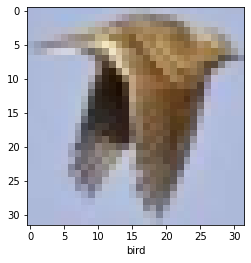

In [10]:
# Show a sample image
sample_id = 123
plt.imshow(features[sample_id])
label_names = ['airplane', 'automobile', 'bird',
            'cat', 'deer', 'dog', 'frog',
            'horse', 'ship', 'truck']
plt.xlabel(label_names[labels[sample_id]])
# labels[sample_id]

In [11]:
# Load all images from batch 1-5
train_features = np.empty([0, 32, 32, 3], dtype=np.uint8)
train_labels = np.empty([0])
for k in range(1, 6):
    with open(datapath + "data_batch_" + str(k), "rb") as f:
        batch = pickle.load(f, encoding="latin1")
        features = batch["data"].reshape([len(batch['data']), 3, 32, 32]).transpose(0, 2, 3, 1)
        labels=batch['labels']
        print("features shape:", features.shape)
        print("labels shape:", len(labels))
        train_features = np.append(train_features, features, axis=0)
        train_labels = np.append(train_labels, labels, axis=0)
print("train_features shape:", train_features.shape)
print("train_labels shape:", train_labels.shape)
        

features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
features shape: (10000, 32, 32, 3)
labels shape: 10000
train_features shape: (50000, 32, 32, 3)
train_labels shape: (50000,)


## Build CNN model
### Create Convolutional Model

The entire model consists of 12 layers in total. In addition to layers below lists what techniques are applied to build the model.

1. Convolution with 32 different filters in size of (3x3)
    - ReLU activation function 
2. Convolution with 32 different filters in size of (3x3)
    - ReLU activation function 
3. Max Pooling by 2
4. Dropout 
5. Convolution with 64 different filters in size of (3x3)
    - ReLU activation function 
6. Convolution with 64 different filters in size of (3x3)
    - ReLU activation function 
7. Max Pooling by 2
8. Dropout 
9. Flattening the 3-D output of the last convolutional operations.
10. Fully Connected Layer with 512 units
11. Dropout 
12. Fully Connected Layer with 10 units (number of image classes)

the image below decribes how the conceptual convolving operation differs from the tensorflow implementation when you use [Channel x Width x Height] tensor format. 

<img src="https://adeshpande3.github.io/assets/Cover.png" alt="Drawing" style="width: 1000px;"/>

In [12]:
batch_size = 32 # How many images to load at a time
num_classes = 10 
epochs = 10
num_predictions = 20

In [13]:
# The number of training iterations:
50000 / 32 * 10

15625.0

In [14]:
# Build CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                              input_shape=features[0].shape, # (32, 32, 3)
                              activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same",
                              activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25)) # Every parameter jhas 25% chance of being dropped.

model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",
                              activation=tf.nn.relu))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",
                              activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))
model.add(tf.keras.layers.Dense(num_classes))

In [15]:
# How can I print the list of layers?
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [17]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [18]:
# Normalize data
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [19]:
train_features_scaled = normalize(train_features)

In [20]:
history = model.fit(train_features_scaled, train_labels, epochs=10, batch_size=batch_size)

Epoch 1/10
1563/1563 [==============================] - 16s 5ms/step - loss: 1.5874 - accuracy: 0.4170
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1235 - accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9492 - accuracy: 0.6659
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8590 - accuracy: 0.6992
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7828 - accuracy: 0.7252
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7369 - accuracy: 0.7415
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6894 - accuracy: 0.7586
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6487 - accuracy: 0.7732
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6197 - accuracy: 0.7835
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.59

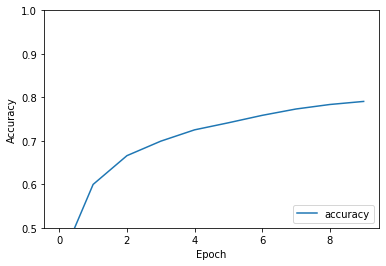

In [21]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label = 'val_accuracy') # allocate validation data to get val_accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
# Load test images
with open(datapath + "test_batch", "rb") as f:
    batch = pickle.load(f, encoding="latin1")
    test_features = batch['data'].reshape([len(batch['data']), 3, 32, 32]).transpose(0, 2, 3, 1)
    test_labels = batch['labels']

In [23]:
# Normalize test features
test_features_scaled = normalize(test_features)

In [24]:
test_labels = np.array(test_labels)
test_labels.shape

(10000,)

In [25]:
test_loss, test_acc = model.evaluate(test_features_scaled,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.6717 - accuracy: 0.7760 - 971ms/epoch - 3ms/step
0.7760000228881836


In [26]:
from sklearn.metrics import confusion_matrix
test_predictions = model(test_features_scaled)

In [31]:
print("Shape:", test_predictions.shape)
print("First prediction (logits):", test_predictions[0])
print("First prediction (probabilities):", tf.nn.softmax(test_predictions[0]))
print("First prediction (class):", np.argmax(tf.nn.softmax(test_predictions[0])))
test_prediction_classes = np.argmax(tf.nn.softmax(test_predictions), axis=1)
print(test_prediction_classes)

Shape: (10000, 10)
First prediction (logits): tf.Tensor(
[-4.9285     -6.2399373  -5.5921736   6.2149873  -6.4491663   3.2058017
  0.99084216 -3.0747318  -4.35042    -4.4878125 ], shape=(10,), dtype=float32)
First prediction (probabilities): tf.Tensor(
[1.3716363e-05 3.6956367e-06 7.0633259e-06 9.4796932e-01 2.9979342e-06
 4.6765074e-02 5.1047793e-03 8.7563021e-05 2.4450987e-05 2.1312157e-05], shape=(10,), dtype=float32)
First prediction (class): 3
[3 8 8 ... 5 1 7]


In [33]:
print(confusion_matrix(test_labels, test_prediction_classes))

[[798  11  56  14  20   4   9   7  38  43]
 [ 17 867   2   3   0   2  16   3  10  80]
 [ 45   3 658  29  87  53  88  19   7  11]
 [ 15   6  68 534  67 174  85  35   4  12]
 [ 17   1  53  34 751  28  52  53   6   5]
 [  7   1  41 127  41 691  29  49   5   9]
 [  5   1  33  21  22  20 887   3   6   2]
 [  7   1  33  24  37  37  12 833   2  14]
 [ 53  19  11   4   7   6  14   4 849  33]
 [ 18  42   4  10   3   2   6   8  15 892]]


In [ ]:
test_predictions_labels = []
for ind in range(10000):
    pred = np.argmax(tf.nn.softmax(test_predictions[ind]))
    test_predictions_labels.append(pred)
print(test_predictions_labels[:10])

In [ ]:
confusion_matrix(test_labels, test_predictions_labels)

## Addition Discussion: What if we train a dense neural network instead?

- Mimic the approach we took in the first neural network example.
- Be aware that each color image is represented as a 3D array.